# Simulações Epidemiológicas

Os experimentos selecionados buscam analisar cenários epidemiológicos para observar o impacto de diferentes taxas de infecção.

| Parâmetro           |   Sim 1   |   Sim 2   |   Sim 3   |
| ------------------- | --------- | --------- | --------- |
| População           |   1000    |   1000    |   1000    |
| **Taxa de Infecção**| **0.001** | **0.002** | **0.005** |
| Taxa de Recuperação |   0.030   |   0.030   |   0.030   |

Considerando uma população finita e o Modelo SIR. Busca-se responder os seguintes questionamentos:
- Qual o impacto da taxa de infecção no comportamento da epidemia?
- Quantos % da população é infectada simultaneamente? Como isso impacta o sistema de saúde?
- Como realizar o "achatamento da curva"?


## Setup de Bibliotecas e Funções

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

col_dict = {
    'y.2': 'Suscetíveis',
    'y'  : 'Infectados',
    'y.1': 'Removidos'
}

uti_cap = int(1000*0.5)

colors = ['green', 
          'red',
          'blue']

In [239]:
def load_data(name, max_iter = -1):
    path = f'data/{name}'

    df = pd.read_csv(f'{path}/SIR-{name}.csv')
    df_cum = pd.read_csv(f'{path}/CUM-{name}.csv')

    df = df.rename(columns=col_dict)
    df_cum = df_cum.rename(columns=col_dict)
    
    if max_iter > 0:
        df = df[1:max_iter+1]
        df_cum = df_cum[1:max_iter+1]
    else:
        df = df[1:]
        df_cum = df_cum[1:]
    
    df = df[col_dict.values()]
    df_cum = df_cum[list(col_dict.values())[1:]]
    
    
    return df, df_cum

## Experimento 1

O Experimento 1 busca simular o espalhamento de uma doença com baixas chances de infecção e taxa de recuperação relativamente alta.

| Parâmetro           | Valor |
| ------------------- | ----- |
| População           | 1000  |
| Taxa de Infecção    | 0.001 |
| Taxa de Recuperação | 0.030 |

In [240]:
sim1, sim1_cum = load_data('sim1')

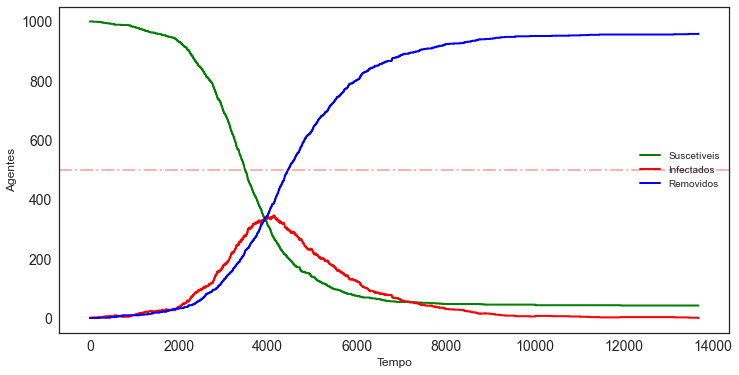

In [241]:
sim1.plot(figsize=(12,6), color=colors, fontsize=14, xlabel='Tempo', ylabel='Agentes')
plt.axhline(uti_cap, color='r', linestyle='-.', alpha=0.3)
plt.savefig('plots/sim1.png')

## Experimento 2

O Experimento 5 busca simular o espalhamento de uma doença com o dobro da chance de infecção anterior e taxa de recuperação relativamente alta.

| Parâmetro           | Valor |
| ------------------- | ----- |
| População           | 1000  |
| Taxa de Infecção    | 0.002 |
| Taxa de Recuperação | 0.030 |

In [242]:
sim2, sim2_cum = load_data('sim2')

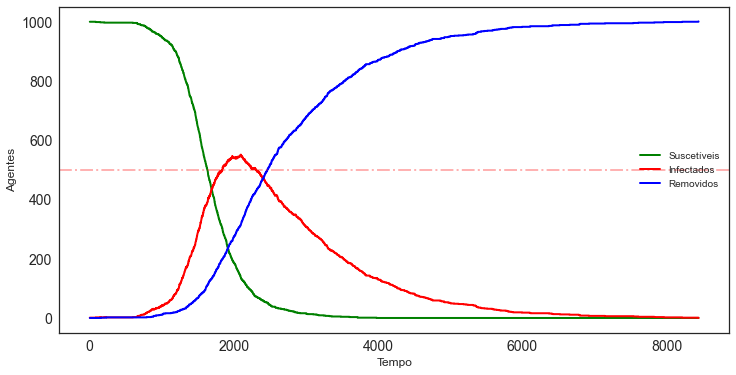

In [243]:
sim2.plot(figsize=(12,6), color=colors, fontsize=14, xlabel='Tempo', ylabel='Agentes')
plt.axhline(uti_cap, color='r', linestyle='-.', alpha=0.3)
plt.savefig('plots/sim2.png')

## Experimento 3

O Experimento 3 busca simular o espalhamento de uma doença com altas chances de infecção.

| Parâmetro           | Valor |
| ------------------- | ----- |
| População           | 1000  |
| Taxa de Infecção    | 0.005 |
| Taxa de Recuperação | 0.030 |

In [244]:
sim3, sim3_cum = load_data('sim3')

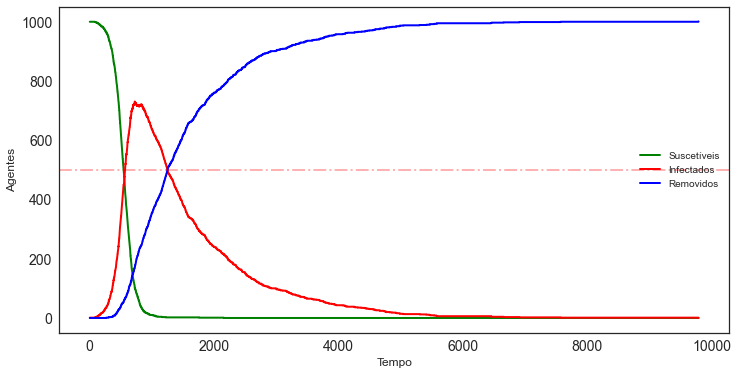

In [245]:
sim3.plot(figsize=(12,6), color=colors, fontsize=14, xlabel='Tempo', ylabel='Agentes')
plt.axhline(uti_cap, color='r', linestyle='-.', alpha=0.3)
plt.savefig('plots/sim3.png')

## Comparando o Número de Infectados

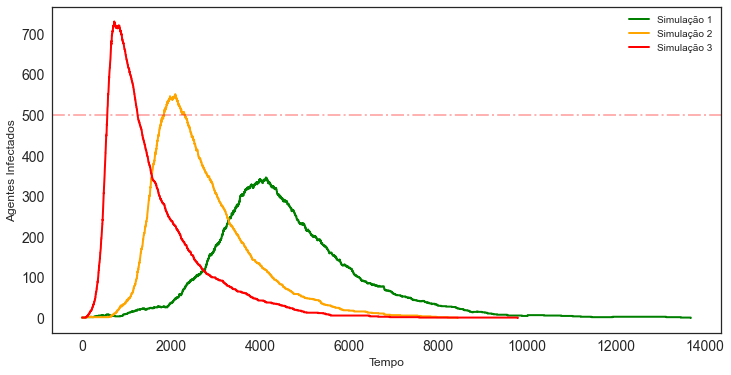

In [246]:
df_inf = pd.DataFrame()

colors = ['green', 'orange', 'red']

df_inf['Simulação 1'] = sim1['Infectados']
df_inf['Simulação 2'] = sim2['Infectados']
df_inf['Simulação 3'] = sim3['Infectados']

df_inf.plot(figsize=(12,6), color=colors, fontsize=14, xlabel='Tempo', ylabel='Agentes Infectados')
plt.axhline(uti_cap, color='r', linestyle='-.', alpha=0.3)
plt.savefig('plots/infected.png')

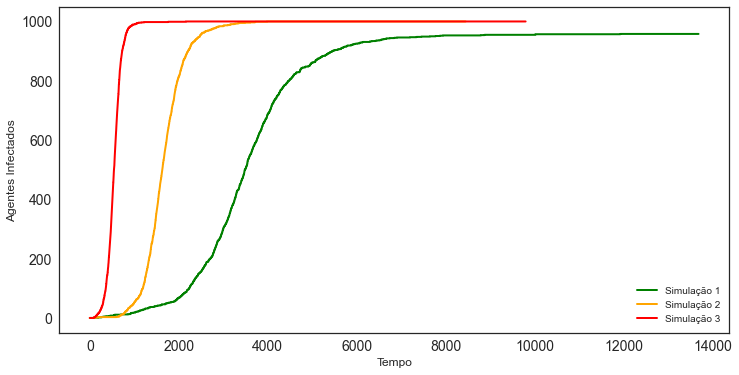

In [247]:
df_cum = pd.DataFrame()

colors = ['green', 'orange', 'red']

df_cum['Simulação 1'] = sim1_cum['Infectados']
df_cum['Simulação 2'] = sim2_cum['Infectados']
df_cum['Simulação 3'] = sim3_cum['Infectados']

df_cum.plot(figsize=(12,6), color=colors, fontsize=14, xlabel='Tempo', ylabel='Agentes Infectados')
plt.savefig('plots/infected_cum.png')